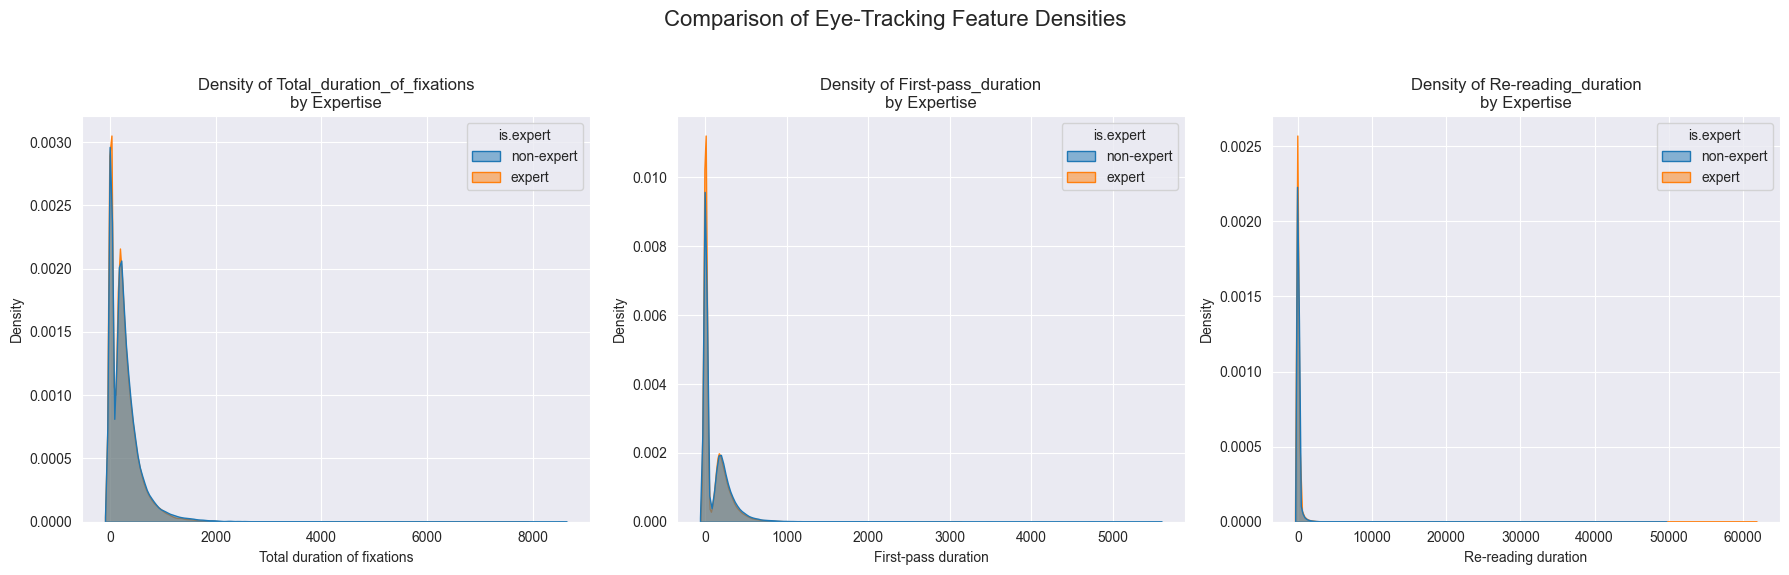

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
file_path = r'data/et_data.csv'
numerical_cols = ['Total_duration_of_fixations', 'First-pass_duration', 'Re-reading_duration']
expertise_col = 'is.expert'

try:
    data = pd.read_csv(file_path, delimiter="\t", quoting=0, low_memory=False)


    for col in numerical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')




    plt.figure(figsize=(18, 6))
    for i, col in enumerate(numerical_cols):
        plt.subplot(1, 3, i + 1)
        sns.kdeplot(data=data, x=col, hue=expertise_col, fill=True, common_norm=False, alpha=0.5)
        plt.title(f'Density of {col}\nby Expertise')
        plt.xlabel(col.replace('_', ' '))
        plt.ylabel('Density')

    plt.suptitle('Comparison of Eye-Tracking Feature Densities', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except KeyError:
    print(f"Error: Please ensure your dataframe has the columns: {numerical_cols} and '{expertise_col}'")

In [7]:
data['First-pass_duration'].dtype

dtype('float64')

Generating log-transformed pairplot with nicer labels...


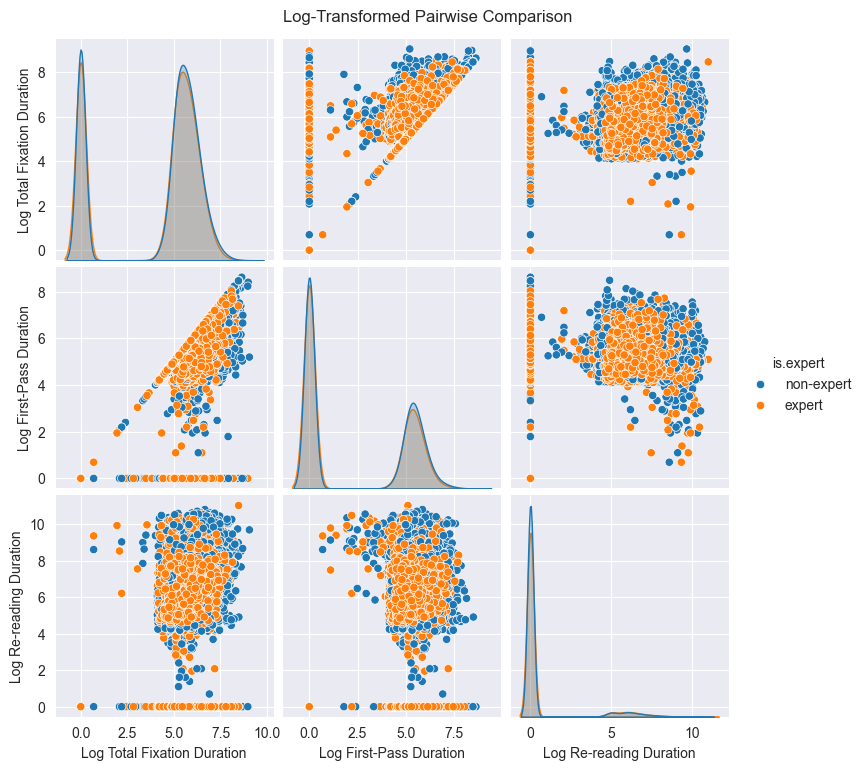

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup from previous step ---
numerical_cols = ['Total_duration_of_fixations', 'First-pass_duration', 'Re-reading_duration']
expertise_col = 'is.expert'

# Ensure the columns are numeric before applying log transformation
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create the log-transformed columns
for col in numerical_cols:
    data[f'log_{col}'] = np.log1p(data[col])

# --- 1. Create a mapping for nicer, more readable names ---
name_mapping = {
    'log_Total_duration_of_fixations': 'Log Total Fixation Duration',
    'log_First-pass_duration': 'Log First-Pass Duration',
    'log_Re-reading_duration': 'Log Re-reading Duration'
}

# --- 2. Rename the columns in the DataFrame ---
data.rename(columns=name_mapping, inplace=True)

# Get the new list of renamed columns to use for plotting
renamed_cols = list(name_mapping.values())

# --- 3. Generate the pairplot with the new, readable names ---
print("Generating log-transformed pairplot with nicer labels...")

sns.pairplot(
    data,
    vars=renamed_cols, # Use the new, renamed columns
    hue=expertise_col,
    diag_kind='kde',
    diag_kws={'common_norm': False}
)

plt.suptitle('Log-Transformed Pairwise Comparison', y=1.02)
plt.show()

Generating improved log-transformed pairplot...


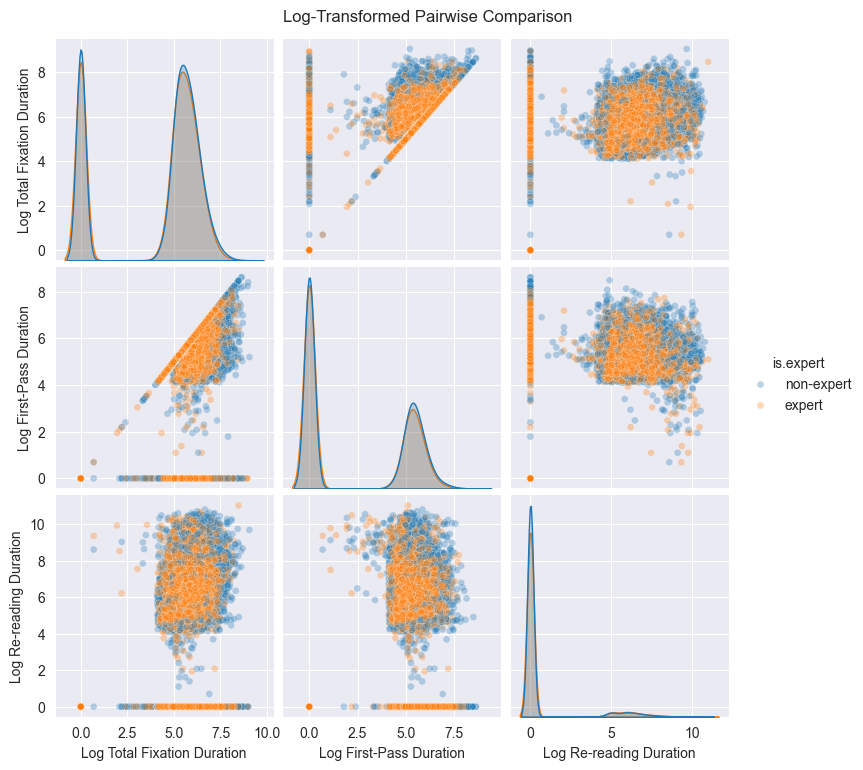

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
file_path = r'data/et_data.csv'
numerical_cols = ['Total_duration_of_fixations', 'First-pass_duration', 'Re-reading_duration']
expertise_col = 'is.expert'

try:
    data = pd.read_csv(file_path, delimiter="\t", quoting=0, low_memory=False)

    for col in numerical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

except:
    print(f"Error: The file was not found at {file_path}")

# Ensure the columns are numeric before applying log transformation
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create the log-transformed columns
for col in numerical_cols:
    data[f'log_{col}'] = np.log1p(data[col])

# --- 1. Create a mapping for nicer, more readable names ---
name_mapping = {
    'log_Total_duration_of_fixations': 'Log Total Fixation Duration',
    'log_First-pass_duration': 'Log First-Pass Duration',
    'log_Re-reading_duration': 'Log Re-reading Duration'
}

# --- 2. Rename the columns in the DataFrame ---
data.rename(columns=name_mapping, inplace=True)

# Get the new list of renamed columns to use for plotting
renamed_cols = list(name_mapping.values())

print("Generating improved log-transformed pairplot...")

sns.pairplot(
    data,
    vars=renamed_cols,
    hue=expertise_col,
    diag_kind='kde',
    diag_kws={'common_norm': False},
    plot_kws={
        'alpha': 0.3,
        's': 25
    }
)

plt.suptitle('Log-Transformed Pairwise Comparison', y=1.02)
plt.show()

Generating PairGrid with 2D KDE plots on a sample of 10000 points...


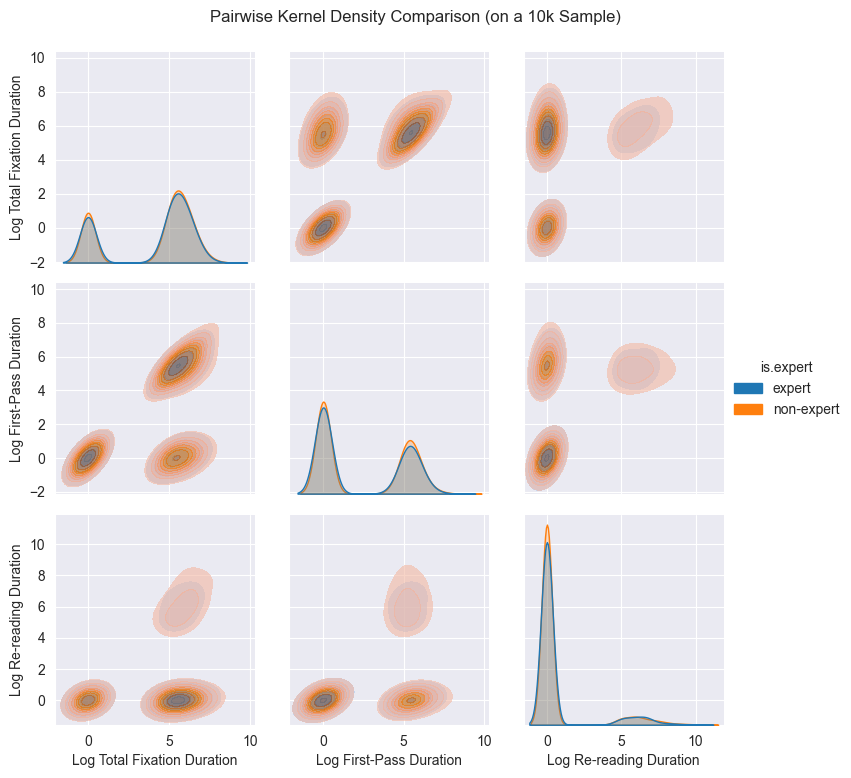

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
file_path = r'data/et_data.csv'
numerical_cols = ['Total_duration_of_fixations', 'First-pass_duration', 'Re-reading_duration']
expertise_col = 'is.expert'
try:
    data = pd.read_csv(file_path, delimiter="\t", quoting=0, low_memory=False)
    for col in numerical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=numerical_cols, inplace=True)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()
for col in numerical_cols:
    data[f'log_{col}'] = np.log1p(data[col])
name_mapping = {
    'log_Total_duration_of_fixations': 'Log Total Fixation Duration',
    'log_First-pass_duration': 'Log First-Pass Duration',
    'log_Re-reading_duration': 'Log Re-reading Duration'
}
data.rename(columns=name_mapping, inplace=True)
renamed_cols = list(name_mapping.values())

# Take a random sample of 10,000 rows.
plot_data = data.sample(n=10000, random_state=42) # random_state for reproducibility

# --- Plotting with PairGrid and 2D KDE on the smaller sample ---
print(f"Generating PairGrid with 2D KDE plots on a sample of {len(plot_data)} points...")

g = sns.PairGrid(plot_data, vars=renamed_cols, hue=expertise_col) # Use plot_data here
g.map_diag(sns.kdeplot, fill=True, common_norm=False)
g.map_offdiag(sns.kdeplot, fill=True, alpha=1)
g.add_legend()
g.fig.suptitle('Pairwise Kernel Density Comparison (on a 10k Sample)', y=1.03)

plt.show()

Generating PairGrid with 2D KDE plots on a sample of 10000 points...


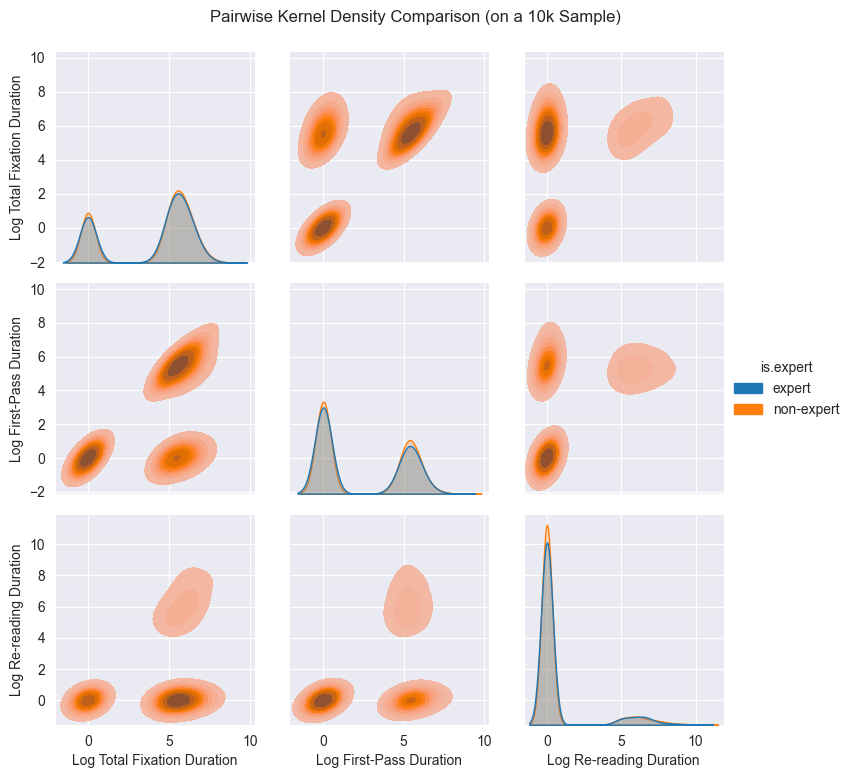

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
file_path = r'data/et_data.csv'
numerical_cols = ['Total_duration_of_fixations', 'First-pass_duration', 'Re-reading_duration']
expertise_col = 'is.expert'
try:
    data = pd.read_csv(file_path, delimiter="\t", quoting=0, low_memory=False)
    for col in numerical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=numerical_cols, inplace=True)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()
for col in numerical_cols:
    data[f'log_{col}'] = np.log1p(data[col])
name_mapping = {
    'log_Total_duration_of_fixations': 'Log Total Fixation Duration',
    'log_First-pass_duration': 'Log First-Pass Duration',
    'log_Re-reading_duration': 'Log Re-reading Duration'
}
data.rename(columns=name_mapping, inplace=True)
renamed_cols = list(name_mapping.values())

# Take a random sample of 10,000 rows.
plot_data = data.sample(n=10000, random_state=42) # random_state for reproducibility

# --- Plotting with PairGrid and 2D KDE on the smaller sample ---
print(f"Generating PairGrid with 2D KDE plots on a sample of {len(plot_data)} points...")

g = sns.PairGrid(plot_data, vars=renamed_cols, hue=expertise_col) # Use plot_data here
g.map_diag(sns.kdeplot, fill=True, common_norm=False)
g.map_offdiag(sns.kdeplot, fill=True, alpha=1)
g.add_legend()
g.fig.suptitle('Pairwise Kernel Density Comparison (on a 10k Sample)', y=1.03)

plt.show()

Generating faceted scatterplot to compare groups side-by-side...


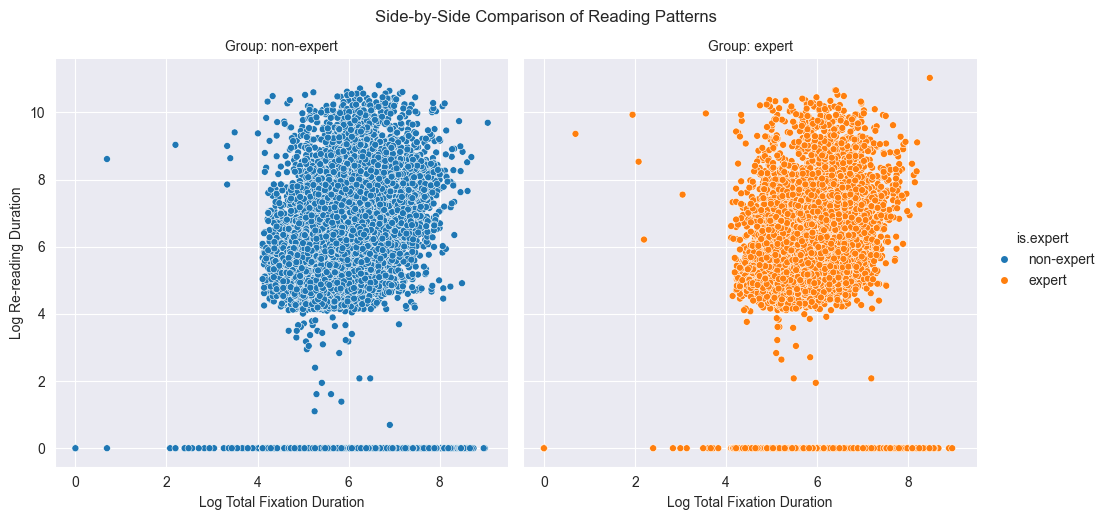

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
# Define file path and key columns
file_path = r'data/et_data.csv'
numerical_cols = ['Total_duration_of_fixations', 'First-pass_duration', 'Re-reading_duration']
expertise_col = 'is.expert'

# Read and clean the data
try:
    data = pd.read_csv(file_path, delimiter="\t", quoting=0, low_memory=False)
    # Convert specified columns to numeric, coercing errors to NaN
    for col in numerical_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    # Drop rows with NaN in these critical columns to ensure clean plotting
    data.dropna(subset=numerical_cols, inplace=True)
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    exit()

# Log-transform the data
for col in numerical_cols:
    data[f'log_{col}'] = np.log1p(data[col])

# Create a mapping for more readable column names
name_mapping = {
    'log_Total_duration_of_fixations': 'Log Total Fixation Duration',
    'log_First-pass_duration': 'Log First-Pass Duration',
    'log_Re-reading_duration': 'Log Re-reading Duration'
}

# Rename the columns in the DataFrame
data.rename(columns=name_mapping, inplace=True)


# --- Plotting a Side-by-Side (Faceted) Scatterplot ---
print("Generating faceted scatterplot to compare groups side-by-side...")


g = sns.relplot(
    data=data,
    x='Log Total Fixation Duration',
    y='Log Re-reading Duration',
    col=expertise_col,
    hue=expertise_col,  # Colors the points within each plot for clarity
    alpha=1,
    s=25
)

g.fig.suptitle('Side-by-Side Comparison of Reading Patterns', y=1.03)
g.set_titles("Group: {col_name}") # Makes the subplot titles clearer

plt.show()

In [12]:
# Select the log-transformed numerical columns
log_numerical_cols = ['log_Total_duration_of_fixations', 'log_First-pass_duration', 'log_Re-reading_duration']

# Calculate the correlation matrix
correlation_matrix = data[log_numerical_cols].corr()

# Print the matrix to see the values
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                 log_Total_duration_of_fixations  \
log_Total_duration_of_fixations                         1.000000   
log_First-pass_duration                                 0.572736   
log_Re-reading_duration                                 0.241786   

                                 log_First-pass_duration  \
log_Total_duration_of_fixations                 0.572736   
log_First-pass_duration                         1.000000   
log_Re-reading_duration                         0.358620   

                                 log_Re-reading_duration  
log_Total_duration_of_fixations                 0.241786  
log_First-pass_duration                         0.358620  
log_Re-reading_duration                         1.000000  


Found 36 numerical features to correlate after exclusions.


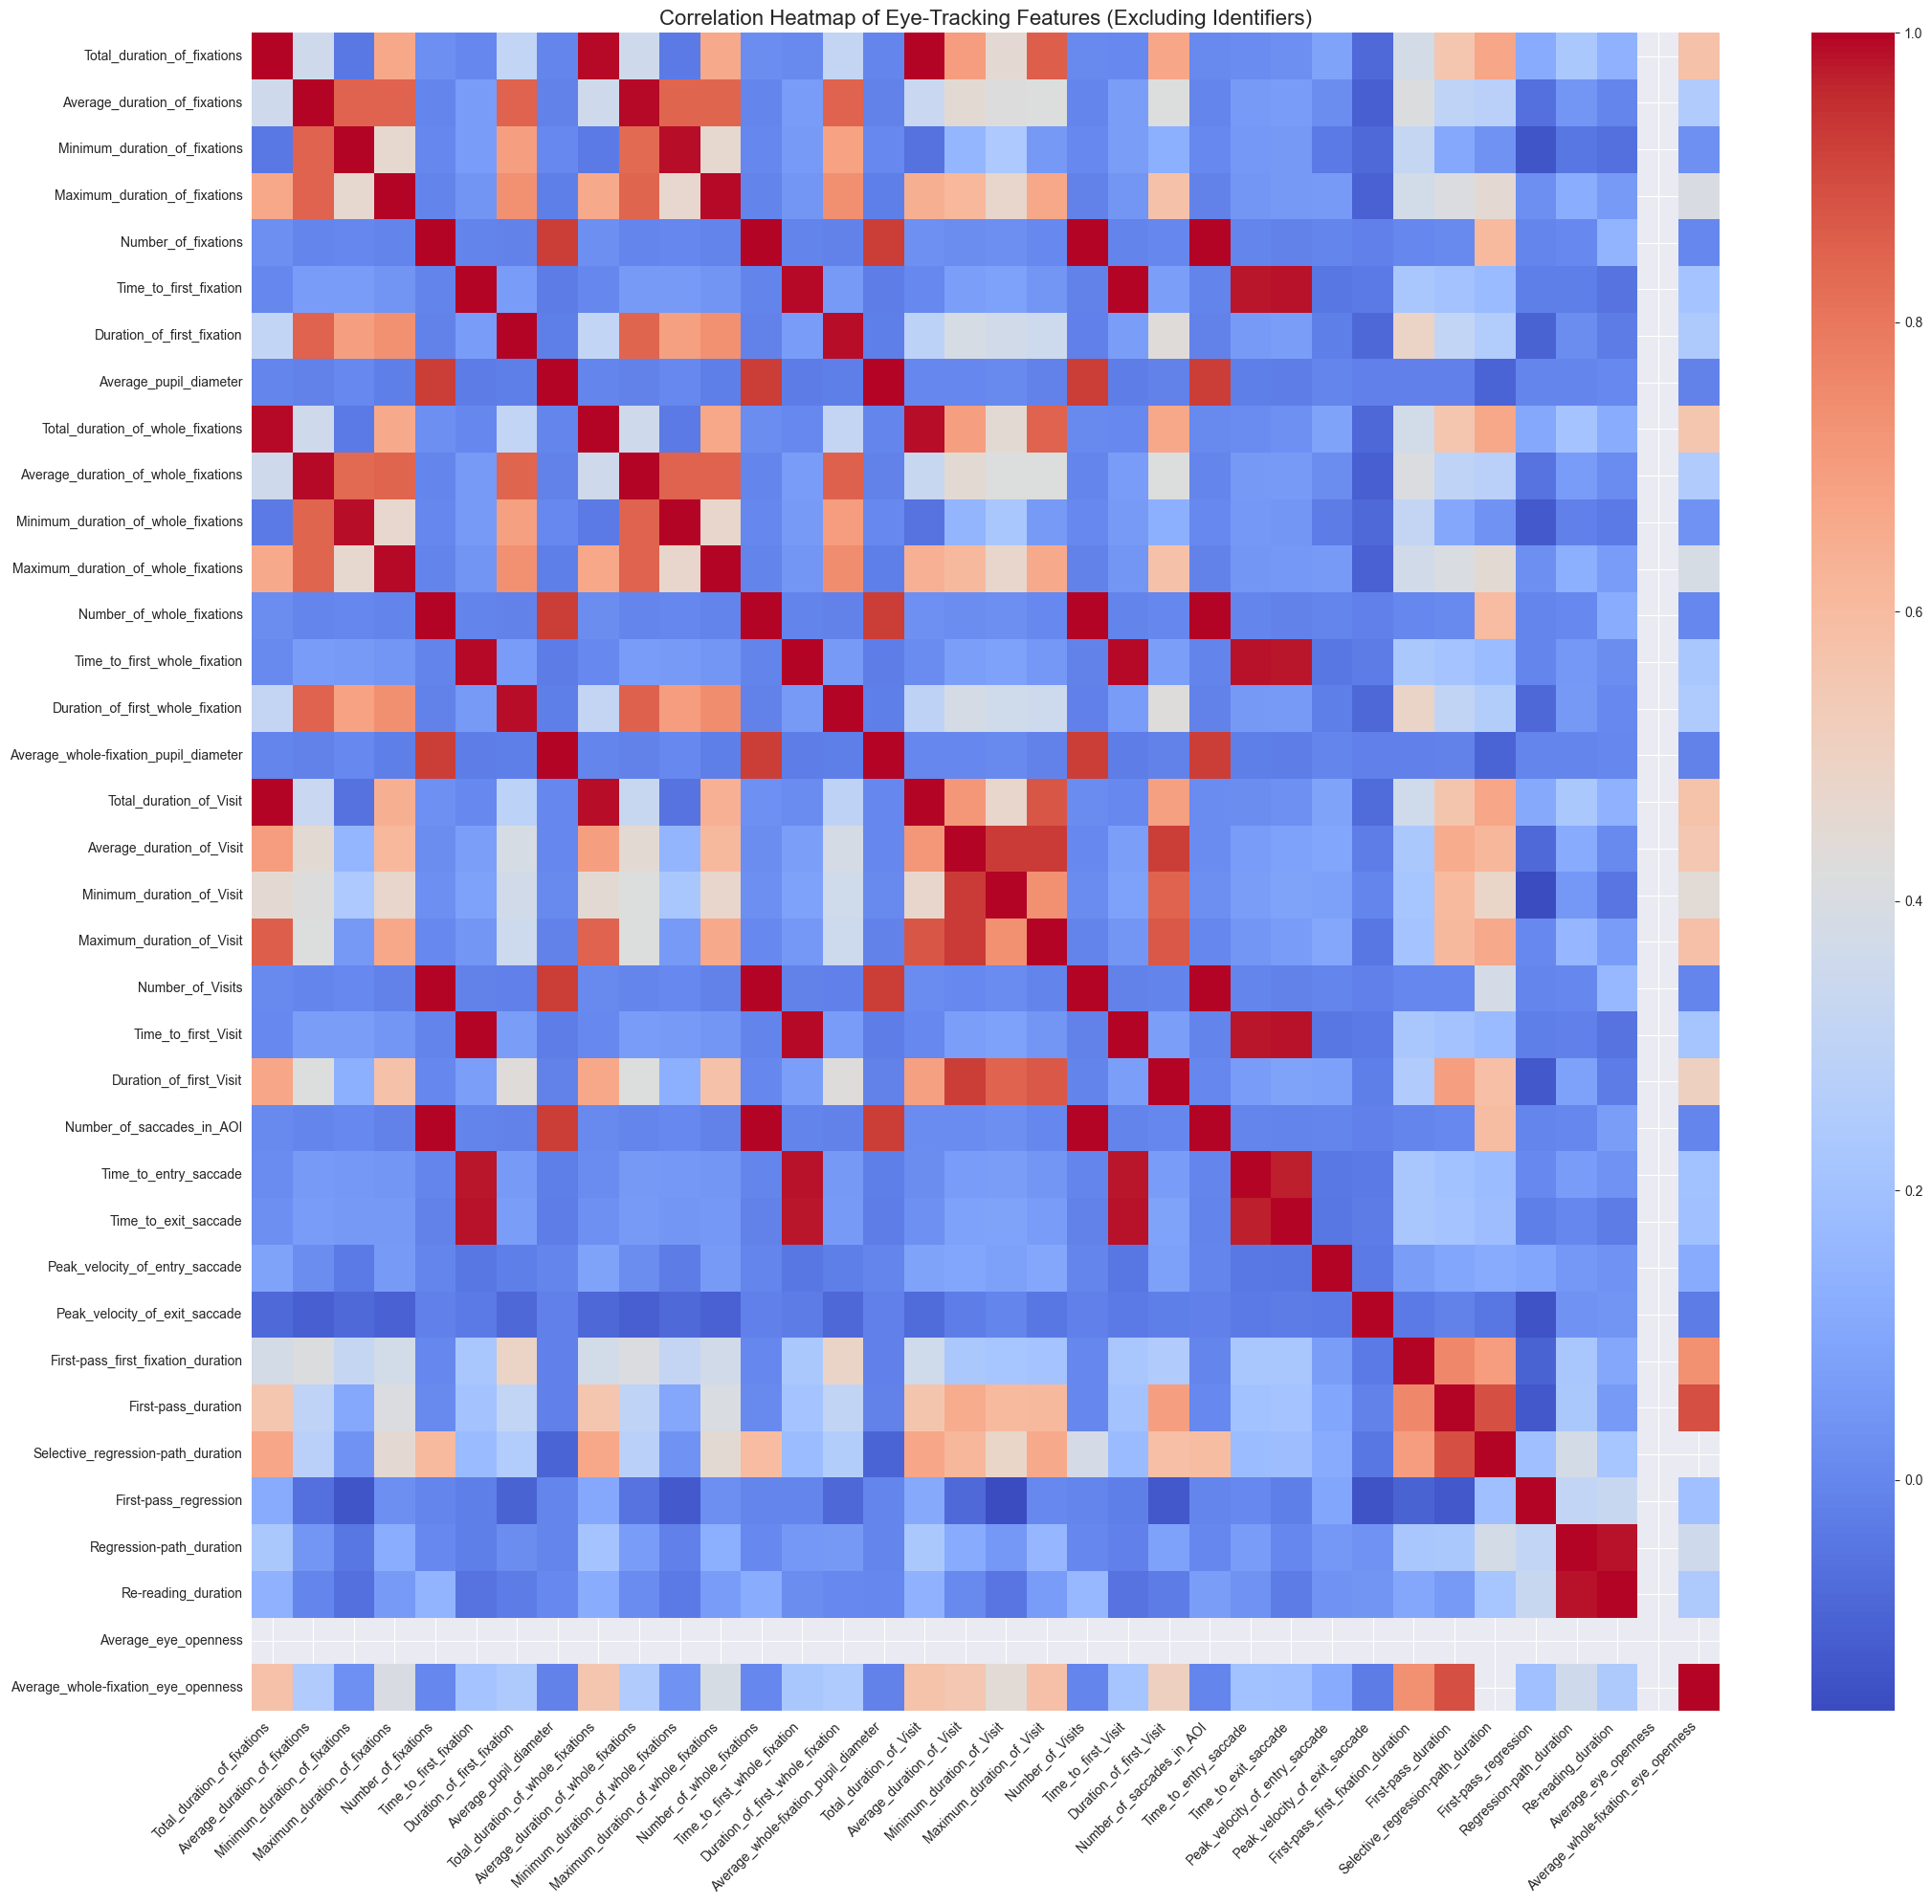

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- Define the columns you want to exclude ---
cols_to_exclude = ['age', 'screenid', 'Sentence_index', 'Word_index', 'log_Total_duration_of_fixations',
                   'log_First-pass_duration', 'log_Re-reading_duration', 'is.expert', 'Participant_unique',
                   'textid', 'id.global.aoi']


# --- 1. Select numerical features, excluding the specified columns ---
# First, drop the unwanted columns, then select the remaining numerical ones.
# errors='ignore' prevents an error if a column name isn't found.
numerical_features = data.drop(columns=cols_to_exclude, errors='ignore') \
                         .select_dtypes(include=np.number)

print(f"Found {numerical_features.shape[1]} numerical features to correlate after exclusions.")


# --- 2. Calculate the correlation matrix for the remaining features ---
full_correlation_matrix = numerical_features.corr()


# --- 3. Create the large heatmap ---
plt.figure(figsize=(22, 20))

sns.heatmap(
    full_correlation_matrix,
    cmap='coolwarm',
    annot=False
)

plt.title('Correlation Heatmap of Eye-Tracking Features (Excluding Identifiers)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()